In [559]:
import ipyvolume.pylab as p3
import numpy as np
import h5py
import matplotlib.cm


colormap = matplotlib.cm.jet_r

def time2color(ts, tmin = -1, tmax = -1):
    if tmin == -1:
        tmin = np.min(ts[ts>0])
    if tmax == -1:
        tmax = np.max(ts)
    delta_t = tmax - tmin
    c = []
    for t in ts:
        if t<tmin:
            col = 0.
        elif t> tmax:
            col =1.
        else:
            col = ((t-tmin)/delta_t)
        c.append(colormap(col)[:3])
    return c

def normalize(arr, on_max=3.):
    amax = np.max(arr[arr>0])
    return [(1.4+on_max*x/amax)  if x>0. else 0 for x in arr]

In [560]:
idata = h5py.File('../data/File_981.h5')
print np.argsort(idata['reco_vals']['hitDOMs'])[-30:]

[1025  733 1346 1170  241  276  547   39  512  691  828  808  450  834 1068
 1062 1446  715 1455    4  206 1213 1261  165 1361  415  495 1360  307  117]


In [561]:
key = 'IC_time_first'
ckey = 'IC_charge'
ev_number = 1360 #1360
if key in idata.keys():
    plt_data = idata[key][ev_number]
    charge = idata[ckey][ev_number] 
else:
    print(idata.keys())

In [562]:
print np.min(plt_data[plt_data>0])
print np.max(plt_data)

6787.0
30149.0


In [563]:
ishape = np.shape(plt_data)
xi, yi , zi = np.meshgrid(1.*np.arange(ishape[0]), 1.*np.arange(ishape[1]), 1.*np.arange(ishape[2]))

In [564]:
x_ic = np.hstack(np.hstack(xi))
y_ic = np.hstack(np.hstack(yi))
z_ic = np.hstack(np.hstack(zi))
c_arr = np.concatenate([charge[int(x_ic[i])][int(y_ic[i])][int(z_ic[i])] for i in range(len(x_ic))])
s_ic = normalize(c_arr)
c_col = time2color([1.*plt_data[int(x_ic[i])][int(y_ic[i])][int(z_ic[i])][0] for i in range(len(x_ic))],
                   tmin = 10000, tmax =15061)

In [565]:
print('Event Type {}'.format(idata['reco_vals'][ev_number]['ClassificationLabel']))
print('Run ID {}'.format(idata['reco_vals'][ev_number]['RunID']))
print('Event ID {}'.format(idata['reco_vals'][ev_number]['EventID']))

Event Type 2.0
Run ID 32233.0
Event ID 2384.0


In [566]:
p3.clear()
p3.scatter(x_ic, y_ic, z_ic, size=0.2, alpha = 0.2, marker="sphere", color = 'grey')
p3.scatter(x_ic, y_ic, z_ic, size=s_ic, marker="sphere", color = c_col)
p3.show()

In [490]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

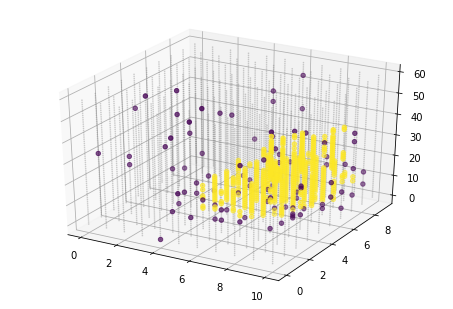

In [434]:
fig = plt.figure(1)
ax =Axes3D(fig)
ax.scatter(x_ic[::], y_ic[::], z_ic[::-1], c = 'Grey', s = 0.5, alpha=0.3)
ax.scatter(x_ic[::], y_ic[::], z_ic[::-1], c = c_col, s = 10*np.array(s_ic)**2)
plt.savefig('event.png')
plt.show()